# Fusión de Dataset entre equipos deportivos y entrenadores de las ligas masculinas y femeninas.
Se realiza la fusión de los Dataset referentes a las ligas europeas, latinoamericanas y femeninas con el Dataset de entrenadores correspondiente. 

# Setting Preliminares

Importar librerías 

In [ ]:
# carga de datos
import pandas as pd
import io
from google.colab import files

# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
import seaborn as sns

import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

# fechas
import datetime
import time



# Carga de Datos

Función de Google Colab para cargar datos.

In [ ]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [ ]:
# Se selecciona el Dataset que contiene los partidos latinoamericanos, latinoamericanos o femeninos
partidos = upload_files() 
partidos.head()

Saving latinoamerica_results to latinoamerica_results
User uploaded file "latinoamerica_results" with length 1962614 bytes


,fecha,jornada,local,visitante,goles_local,goles_visitante,liga
0,07-07-2022,1,Unión Magdalena,Once Caldas,2.0,2.0,betplay_dimayor
1,08-07-2022,1,Deportivo Pereira,Alianza Petrolera,1.0,2.0,betplay_dimayor
2,NaN,1,Patriotas FC,Atlético Junior,1.0,0.0,betplay_dimayor
3,09-07-2022,1,Envigado FC,América de Cali,0.0,0.0,betplay_dimayor
4,10-07-2022,1,Atlético Bucaramanga,Rionegro Águilas Doradas,NaN,NaN,betplay_dimayor


In [ ]:
partidos.shape

(30280, 7)

In [ ]:
#Se selecciona el Dataset que contiene los entrenadores latinoamericanos, latinoamericanos o femeninos
entrenadores = upload_files() 
entrenadores.head()

Saving latinoamerica_managers to latinoamerica_managers
User uploaded file "latinoamerica_managers" with length 337716 bytes


,club,fecha_activo_inicio,fecha_activo_fin,entrenador,pais,fecha_nacimiento,liga
0,Unión Magdalena,12-04-2022,31-12-2022,Claudio Rodríguez,Argentina,17-01-1960,betplay_dimayor
1,Unión Magdalena,17-09-2019,11-04-2022,Carlos Silva,Colombia,29-04-1973,betplay_dimayor
2,Unión Magdalena,01-07-2019,16-09-2019,Pedro Sarmiento,Colombia,26-10-1956,betplay_dimayor
3,Unión Magdalena,15-08-2017,30-06-2019,Harold Rivera,Colombia,06-07-1970,betplay_dimayor
4,Unión Magdalena,01-08-2015,31-12-2015,Carlos Silva,Colombia,29-04-1973,betplay_dimayor


#Codigo para rellenar fechas faltantes

In [ ]:
# funcion para detectar NaN o nan
def isNaN(num):
    return num != num

In [ ]:
fecha_completar=""
for x in list(range(len(partidos))):
  if isNaN(partidos['fecha'][x]):
    partidos['fecha'][x] = fecha_completar
  else:
    fecha_completar = partidos['fecha'][x]
partidos.head(5)

,fecha,jornada,local,visitante,goles_local,goles_visitante,liga
index,,,,,,,
0,,38,Boca Juniors,Talleres de Córdoba,2.0,4.0,primera_division_argentina
1,,38,Deportivo Español,Racing de Córdoba,1.0,0.0,primera_division_argentina
2,,38,Ferro Carril Oeste,Chacarita Juniors,2.0,0.0,primera_division_argentina
3,,38,Gimnasia de La Plata,Newell's Old Boys,1.0,1.0,primera_division_argentina
4,,38,Huracán,San Lorenzo,1.0,1.0,primera_division_argentina


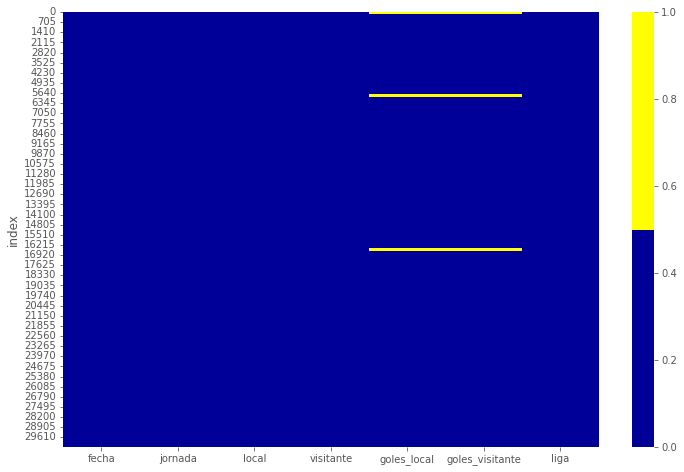

In [ ]:
cols = partidos.columns[:20] # primeras columnas
colours = ['#000099', '#ffff00'] # amarillo para los perdidos y azul para los no perdidos
sns.heatmap(partidos[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
partidos.isnull().sum()

fecha                0
jornada              0
local                0
visitante            0
goles_local        425
goles_visitante    425
liga                 0
dtype: int64

In [ ]:
pd.isnull(partidos).any()

fecha              False
jornada            False
local              False
visitante          False
goles_local         True
goles_visitante     True
liga               False
dtype: bool

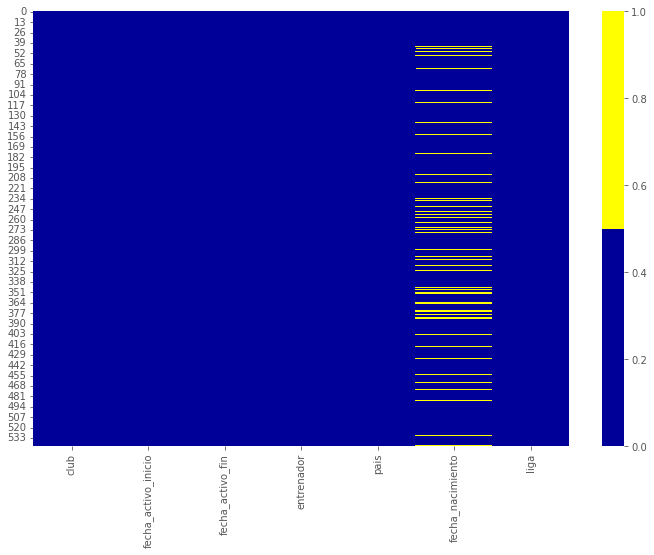

In [ ]:
cols = entrenadores.columns[:20] # primeras columnas
colours = ['#000099', '#ffff00'] # amarillo para los perdidos y azul para los no perdidos
sns.heatmap(entrenadores[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
entrenadores.isnull().sum()

club                    0
fecha_activo_inicio     0
fecha_activo_fin        0
entrenador              0
pais                    0
fecha_nacimiento       68
liga                    0
dtype: int64

In [ ]:
pd.isnull(entrenadores).any()

club                   False
fecha_activo_inicio    False
fecha_activo_fin       False
entrenador             False
pais                   False
fecha_nacimiento        True
liga                   False
dtype: bool

# Prueba Codigo para transformar y comparar fechas

In [ ]:
#codigo para transformar en fecha correcto
fecha1=(entrenadores['fecha_activo_inicio'][0])
fecha1_lista=fecha1.replace('-','/')
formatted_date1 = time.strptime(fecha1_lista, "%d/%m/%Y")
formatted_date1

time.struct_time(tm_year=2022, tm_mon=9, tm_mday=11, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=6, tm_yday=254, tm_isdst=-1)

In [ ]:
#codigo para transformar en fecha incorrecto
fecha2=(entrenadores['fecha_activo_inicio'][1])
fecha2_lista=fecha2.split("-")
fecha2_ordenada=fecha2_lista[2]+"/"+fecha2_lista[1]+"/"+fecha2_lista[0]
formatted_date2 = time.strptime(fecha2_ordenada, "%d/%m/%Y")
formatted_date2

In [ ]:
formatted_date1 < formatted_date2

True

# Codigo unir datasets partidos y entrenadores por medio de la fecha

In [ ]:
entrenador_local=[None]*len(partidos)
pais_entrenador_local=[None]*len(partidos)

#Recorrer entrenadores
for entrenador in list(range(len(entrenadores))):
  print(entrenador)
#for entrenador in list(range(2)):
  #Fecha entrenador inicio
  fecha_entrenador_inicio=(entrenadores['fecha_activo_inicio'][entrenador])
  fecha_entrenador_inicio_lista=fecha_entrenador_inicio.replace('-','/')
  fecha_entrenador_inicio_formatted_date = time.strptime(fecha_entrenador_inicio_lista, "%d/%m/%Y")
  #Fecha  entrenador fin
  fecha_entrenador_fin=(entrenadores['fecha_activo_fin'][entrenador])
  fecha_entrenador_fin_lista=fecha_entrenador_fin.replace('-','/')
  fecha_entrenador_fin_formatted_date = time.strptime(fecha_entrenador_fin_lista, "%d/%m/%Y")
  #Recorrer clubes
  for club in list(range(len(partidos))):
    #Comparar club del equipo con club del entrenador
    if partidos['local'][club] == entrenadores['club'][entrenador]:
      #Fecha club
      fecha_club=(partidos['fecha'][club])
      fecha_club_lista=fecha_club.replace('-','/')
      print(fecha_club_lista)
      fecha_club_formatted_date = time.strptime(fecha_club_lista, "%d/%m/%Y")
      #Comprovar si la fecha del equipo se encuentra en el rango de fechas del entrenador
      if fecha_club_formatted_date >= fecha_entrenador_inicio_formatted_date and fecha_club_formatted_date <= fecha_entrenador_fin_formatted_date:
        #asignar a la lista del entrenador en la posicion actual el valor del entrenador
        entrenador_local[club] = entrenadores['entrenador'][entrenador]
        pais_entrenador_local[club] = entrenadores['pais'][entrenador]
        

partidos['entrenador_local']=entrenador_local
partidos['pais_entrenador_local']=pais_entrenador_local

Se han truncado las últimas 5000 líneas del flujo de salida.
24/02/1995
13/03/1995
27/03/1995
10/04/1995
24/04/1995
09/05/1995
22/05/1995
09/06/1995
23/06/1995
16/09/1994
30/09/1994
10/10/1994
24/10/1994
02/11/1994
14/11/1994
18/11/1994
02/12/1994
09/12/1994
19/12/1994
06/04/1994
22/04/1994
03/05/1994
13/05/1994
23/05/1994
10/06/1994
29/07/1994
19/08/1994
10/09/1993
17/09/1993
29/09/1993
15/10/1993
25/10/1993
05/11/1993
27/11/1993
07/12/1993
17/12/1993
01/03/1993
18/03/1993
08/09/1987
20/09/1987
04/10/1987
12/10/1987
18/10/1987
30/10/1987
06/11/1987
22/11/1987
04/12/1987
18/12/1987
31/01/1988
19/02/1988
05/03/1988
20/03/1988
10/04/1988
24/04/1988
08/05/1988
29/05/1988
13/07/1986
2296
05/06/2022
16/06/2022
25/06/2022
10/07/2022
18/07/2022
26/07/2022
07/08/2022
20/08/2022
04/09/2022
14/09/2022
25/09/2022
05/10/2022
12/10/2022
17/07/2021
25/07/2021
08/08/2021
21/08/2021
29/08/2021
16/09/2021
26/09/2021
10/10/2021
21/10/2021
31/10/2021
19/11/2021
01/12/2021
14/12/2021
05/08/2019
26/08/2019

ValueError: ignored

In [ ]:
entrenador_visitante=[None]*len(partidos)
pais_entrenador_visitante=[None]*len(partidos)

#Recorrer entrenadores
for entrenador in list(range(len(entrenadores))):
  print(entrenador)
#for entrenador in list(range(2)):
  #Fecha entrenador inicio
  fecha_entrenador_inicio=(entrenadores['fecha_activo_inicio'][entrenador])
  fecha_entrenador_inicio_lista=fecha_entrenador_inicio.replace('-','/')
  fecha_entrenador_inicio_formatted_date = time.strptime(fecha_entrenador_inicio_lista, "%d/%m/%Y")
  #Fecha  entrenador fin
  fecha_entrenador_fin=(entrenadores['fecha_activo_fin'][entrenador])
  fecha_entrenador_fin_lista=fecha_entrenador_fin.replace('-','/')
  fecha_entrenador_fin_formatted_date = time.strptime(fecha_entrenador_fin_lista, "%d/%m/%Y")
  #Recorrer clubes
  for club in list(range(len(partidos))):
    #Comparar club del equipo con club del entrenador
    if partidos['visitante'][club] == entrenadores['club'][entrenador]:
      #Fecha club
      fecha_club=(partidos['fecha'][club])
      fecha_club_lista=fecha_club.replace('-','/')
      fecha_club_formatted_date = time.strptime(fecha_club_lista, "%d/%m/%Y")
      #Comprovar si la fecha del equipo se encuentra en el rango de fechas del entrenador
      if fecha_club_formatted_date >= fecha_entrenador_inicio_formatted_date and fecha_club_formatted_date <= fecha_entrenador_fin_formatted_date:
        #asignar a la lista del entrenador en la posicion actual el valor del entrenador
        entrenador_visitante[club] = entrenadores['entrenador'][entrenador]
        pais_entrenador_visitante[club] = entrenadores['pais'][entrenador]
        

partidos['entrenador_visitante']=entrenador_visitante
partidos['pais_entrenador_visitante']=pais_entrenador_visitante

In [ ]:
partidos.head(10)

In [ ]:
entrenadores.head(10)

# Generar Dataset de salida

In [ ]:
#Descargar dataframe
from google.colab import files

with open('latinoamerica_resultados.csv', 'w') as f:
  partidos.to_csv(f,  index = False)
  

#files.download('europa_resultados.csv')
files.download('latinoamerica_resultados.csv')
#files.download('europa_femenina_resultados.csv')

partidos.head()